## Observations and Insights 

Observations about the study on tumor reductions in mice.
1)


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
std_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mo_st_data = pd.merge(mouse_data,std_results,how='left',on='Mouse ID')
mo_st_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mice=len(mouse_data)
mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = mo_st_data[mo_st_data.duplicated(['Mouse ID','Timepoint'])]
dup_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = mo_st_data.loc[(mo_st_data['Mouse ID']=='g989'),:]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mo_st_data = mo_st_data[mo_st_data['Mouse ID'] != 'g989']
clean_mo_st_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_mo_st_data['Mouse ID'].unique())
total_mice

248

## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_clean_mo_st_data = clean_mo_st_data.groupby(clean_mo_st_data['Drug Regimen'])
mean = round(drug_clean_mo_st_data['Tumor Volume (mm3)'].mean(),4)
median = round(drug_clean_mo_st_data['Tumor Volume (mm3)'].median(),4)
variance = round(drug_clean_mo_st_data['Tumor Volume (mm3)'].var(),4)
std_dev = round(drug_clean_mo_st_data['Tumor Volume (mm3)'].std(),4)
sem = round(drug_clean_mo_st_data['Tumor Volume (mm3)'].sem(),4)

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics = pd.DataFrame({'Mean':mean,
                                  'Median':median,
                                  'Variance':variance,
                                  'Standard Deviation':std_dev,
                                  'SEM':sem})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


## Bar Plots

Text(0.5, 1.0, 'Study Results for Each Drug Treatment')

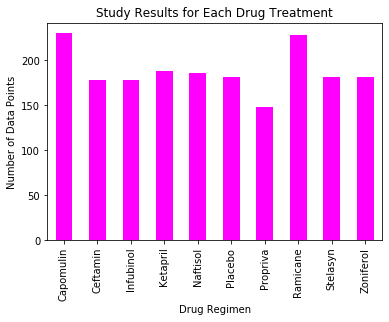

In [49]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the 
#course of the study using pandas. 
mice_count = drug_clean_mo_st_data['Mouse ID'].count()
plot = mice_count.plot(kind='bar',facecolor='magenta')
plt.ylabel('Number of Data Points')
plt.title('Study Results for Each Drug Treatment')

In [97]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pyplot.
#f,ax =plt.subplots(figsize=(7,5))
sort_data = clean_mo_st_data.sort_values(['Drug Regimen'])
sort_data
plt.bar(clean_mo_st_data['Drug Regimen'].unique(),mice_count,color='magenta')
plt.tight_layout
plt.xticks(rotation=45)
plt.ylabel('Number of Data Points')
#plt.title('Study Results for Each Drug Treatment')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
347,v923,Capomulin,Female,19,21,30,40.752216,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
357,g316,Capomulin,Female,22,22,30,44.221480,2
356,g316,Capomulin,Female,22,22,25,46.809225,1
355,g316,Capomulin,Female,22,22,20,45.933322,1
...,...,...,...,...,...,...,...,...
1324,o926,Zoniferol,Male,15,29,40,59.903044,3
1323,o926,Zoniferol,Male,15,29,35,58.593993,3
1322,o926,Zoniferol,Male,15,29,30,56.917398,3
591,b313,Zoniferol,Male,12,27,15,49.188387,1


## Pie Plots

Text(0.5, 1.0, 'Distribution of Mice Gender in the Study')

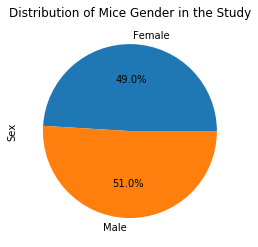

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_mo_st_data.groupby(['Sex'])
mice_gen = mice_gender['Sex'].count()
gen_plot = mice_gen.plot(kind ='pie',autopct="%1.1f%%")
plt.title('Distribution of Mice Gender in the Study')

Text(0.5, 1.0, 'Distribution of Mice Gender in the Study')

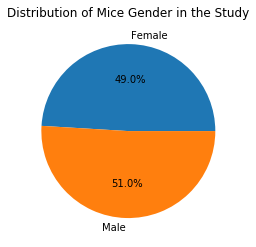

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels ='Female','Male'
plt.pie(mice_gen,labels=labels,autopct="%1.1f%%")
plt.title('Distribution of Mice Gender in the Study')

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin, Ramicane, Infubinol, and Ceftamin
set_drug_index = clean_mo_st_data.set_index('Drug Regimen')
first_drug = set_drug_index.loc[['Capomulin'],['Mouse ID','Tumor Volume (mm3)']]
first_drug_clean = first_drug.drop_duplicates('Mouse ID',keep='last')
quartiles = round(first_drug_clean['Tumor Volume (mm3)'].quantile([.25, .5, .75]),4)
lowerq = round(quartiles[0.25],4)
upperq = round(quartiles[0.75],4)
iqr = round(upperq - lowerq,4)
print(f"\033[1mCapomulin Data\033[0m")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")
lower_bound = round(lowerq - (1.5*iqr),4)
upper_bound = round(upperq + (1.5*iqr),4)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('')

second_drug = set_drug_index.loc[['Ramicane'],['Mouse ID','Tumor Volume (mm3)']]
second_drug_clean = second_drug.drop_duplicates('Mouse ID',keep='last')
quartiles = round(second_drug_clean['Tumor Volume (mm3)'].quantile([.25, .5, .75]),4)
lowerq = round(quartiles[0.25],4)
upperq = round(quartiles[0.75],4)
iqr = round(upperq - lowerq,4)
print(f"\033[1mRamicane Data\033[0m")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")
lower_bound = round(lowerq - (1.5*iqr),4)
upper_bound = round(upperq + (1.5*iqr),4)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('')

third_drug = set_drug_index.loc[['Infubinol'],['Mouse ID','Tumor Volume (mm3)']]
third_drug_clean = third_drug.drop_duplicates('Mouse ID',keep='last')
quartiles = round(third_drug_clean['Tumor Volume (mm3)'].quantile([.25, .5, .75]),4)
lowerq = round(quartiles[0.25],4)
upperq = round(quartiles[0.75],4)
iqr = round(upperq - lowerq,4)
print(f"\033[1mInfubinol Data\033[0m")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")
lower_bound = round(lowerq - (1.5*iqr),4)
upper_bound = round(upperq + (1.5*iqr),4)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fourth_drug = set_drug_index.loc[['Ceftamin'],['Mouse ID','Tumor Volume (mm3)']]
fourth_drug_clean = fourth_drug.drop_duplicates('Mouse ID',keep='last')
quartiles = round(fourth_drug_clean['Tumor Volume (mm3)'].quantile([.25, .5, .75]),4)
lowerq = round(quartiles[0.25],4)
upperq = round(quartiles[0.75],4)
iqr = round(upperq - lowerq,4)
print(f"\033[1mCeftamin Data\033[0m")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")
lower_bound = round(lowerq - (1.5*iqr),4)
upper_bound = round(upperq + (1.5*iqr),4)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin Data
Lower quartile: 32.3774
Upper quartile: 40.1592
IQR: 7.7818
Median: 38.1252 
Values below 20.7047 could be outliers.
Values above 51.8319 could be outliers.

Ramicane Data
Lower quartile: 31.5605
Upper quartile: 40.659
IQR: 9.0985
Median: 36.5617 
Values below 17.9128 could be outliers.
Values above 54.3067 could be outliers.

Infubinol Data
Lower quartile: 54.0486
Upper quartile: 65.5257
IQR: 11.4771
Median: 60.1652 
Values below 36.8329 could be outliers.
Values above 82.7414 could be outliers.
Ceftamin Data
Lower quartile: 48.7221
Upper quartile: 64.2998
IQR: 15.5777
Median: 59.852 
Values below 25.3555 could be outliers.
Values above 87.6664 could be outliers.


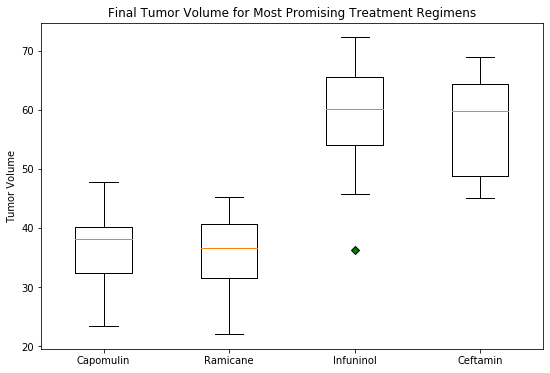

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
f_cap_tumor = first_drug_clean['Tumor Volume (mm3)']
f_ram_tumor = second_drug_clean['Tumor Volume (mm3)']
f_inf_tumor = third_drug_clean['Tumor Volume (mm3)']
f_cef_tumor = fourth_drug_clean['Tumor Volume (mm3)']
green_diamond = dict(markerfacecolor='g', marker='D')
data_to_plot = [f_cap_tumor,f_ram_tumor,f_inf_tumor,f_cef_tumor]
fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot(111)
bp=ax.boxplot(data_to_plot,flierprops=green_diamond)
fig.savefig('fig1.png', bbox_inches='tight')
ax.set_xticklabels(['Capomulin','Ramicane','Infuninol','Ceftamin'])
plt.ylabel('Tumor Volume')
plt.title('Final Tumor Volume for Most Promising Treatment Regimens')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

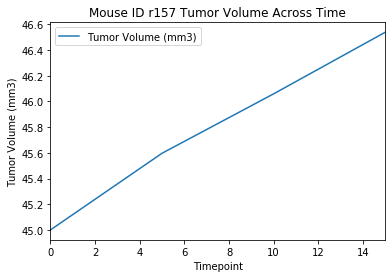

In [91]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_data = clean_mo_st_data.loc[(clean_mo_st_data['Drug Regimen']== 'Capomulin') & (clean_mo_st_data['Mouse ID'] == 'r157')]
cap_t_data = cap_data['Timepoint']
cap_tum_vol = cap_data['Tumor Volume (mm3)']

cap_data_df = pd.DataFrame({"Timepoint": cap_t_data,
                           "Tumor Volume (mm3)": cap_tum_vol})

time_tum_vol = cap_data_df.plot.line(x= "Timepoint", y= "Tumor Volume (mm3)")

plt.title("Mouse ID r157 Tumor Volume Across Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

(20, 50)

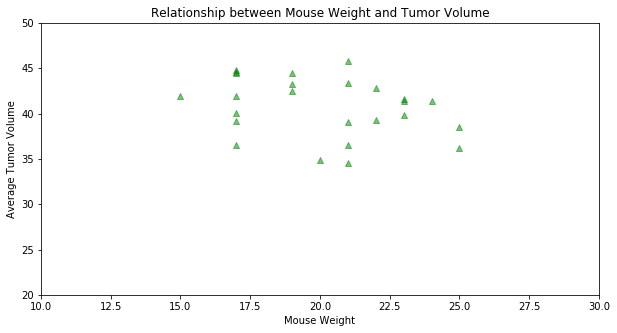

In [92]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_data = clean_mo_st_data.loc[(clean_mo_st_data['Drug Regimen']== 'Capomulin')]
sort_cap_wt_data = cap_data.drop_duplicates('Mouse ID',keep='first')
sort_cap_wt_data = sort_cap_wt_data.sort_values(['Weight (g)'])
cap_tum_mean = cap_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
wht = sort_cap_wt_data['Weight (g)']
tum_vol = cap_tum_mean

f, ax=plt.subplots(figsize = (10, 5))
plt.scatter(wht, tum_vol, marker = "^", facecolor = "green", alpha = 0.5)

#m, b = np.polyfit(wht, tum_vol, 1)
#plt.plot(wht, m*wht + b)

plt.title("Relationship between Mouse Weight and Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

plt.xlim(10, 30)
plt.ylim(20, 50)


## Correlation and Regression

The r-squared is: 0.08790969258698474


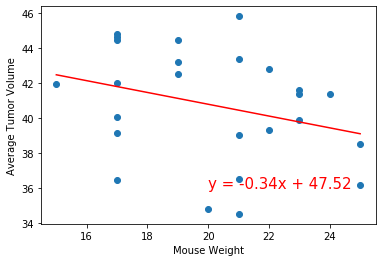

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef = round(st.pearsonr(wht,tum_vol)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(wht,tum_vol)
r_sq = round(rvalue*2)
regress_values = wht * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(wht,tum_vol)
plt.plot(wht,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()